<a href="https://colab.research.google.com/github/HarshdeepSrivastava/Dog-Breed-Classification/blob/master/Dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-end Multi-class Dog Breed Classifation

This notebook builds an end-to-end multi-class image classifier using TensorFlow Hub.

## 1. Problem
Identifying the breed of dog given an image of a dog.

## 2. Data

https://www.kaggle.com/c/dog-breed-identification/data

Data from kaggle dog breed identification competition.

## 3. Evaluation 

The evaluation is a file with predection probabilites for each dog breed for each test image

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features

Some information about the data:
* Dealing with images (Unstructured)
* Using Deep/Transfer learning
* 120 Breeds of dogs with 120 different classes 
* 10000+ images in both train and test sets

In [0]:
# unzip the data
#!unzip "/content/drive/My Drive/Dog vision/dog-breed-identification.zip" -d "/content/drive/My Drive/Dog vision/"

Workspace

In [2]:
# Import TensorFlow in CoLab
import tensorflow as tf
print('TF version:',tf.__version__)

TF version: 2.2.0


In [3]:
# Import TensorFlow Hub and use GPU
import tensorflow_hub as hub
print('TF hub version', hub.__version__)

print('GPU', 'Available'if tf.config.list_physical_devices('GPU')else 'not available')

TF hub version 0.8.0
GPU Available


**Getting our data Ready....Turning it into Tensors**

# Turning our images into tensors (numerical representation)

In [4]:
# checkout the labels our data
import pandas as pd
labels_csv = pd.read_csv('/content/drive/My Drive/Dog vision/labels.csv')
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     985bbacc9509d794dde32e0619b3264e  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [5]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

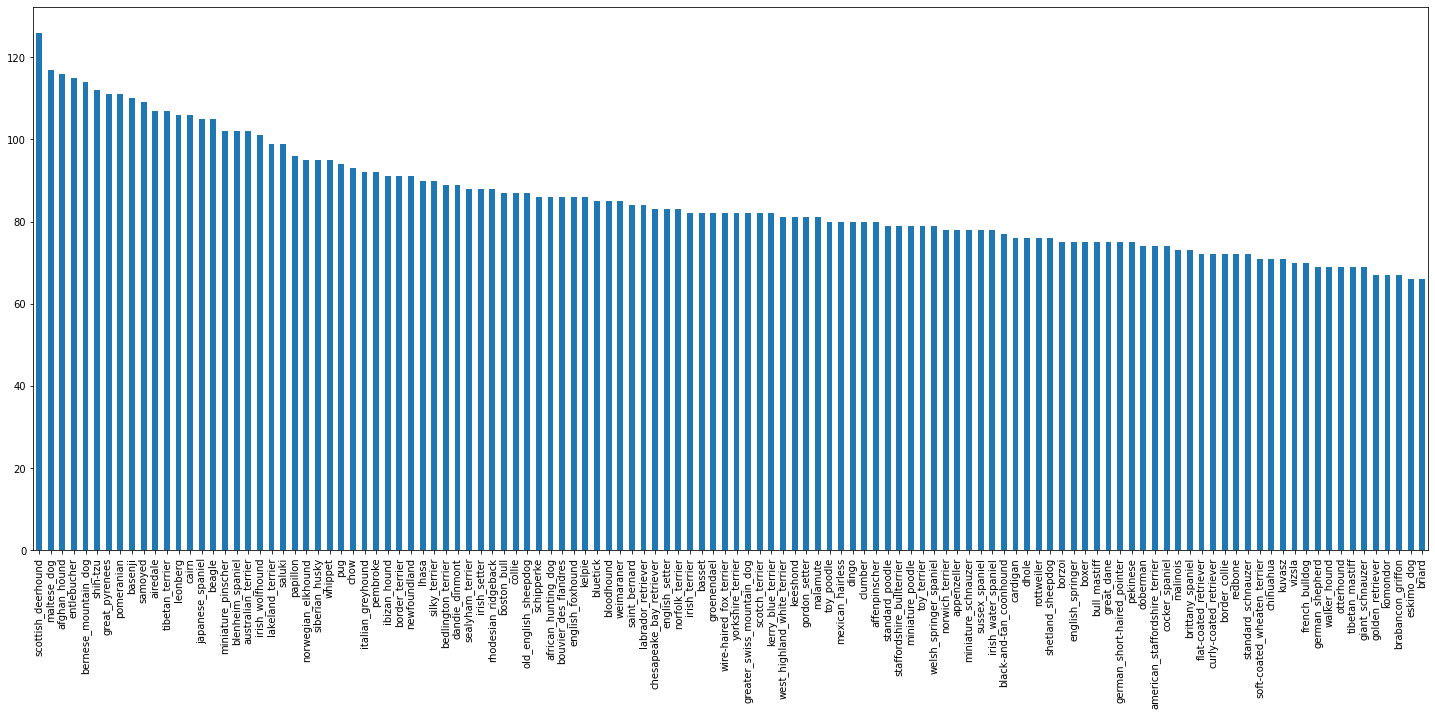

In [6]:
# How many images are there per breed
labels_csv['breed'].value_counts().plot.bar(figsize=(25,10))

In [7]:
labels_csv['breed'].value_counts().median()

82.0

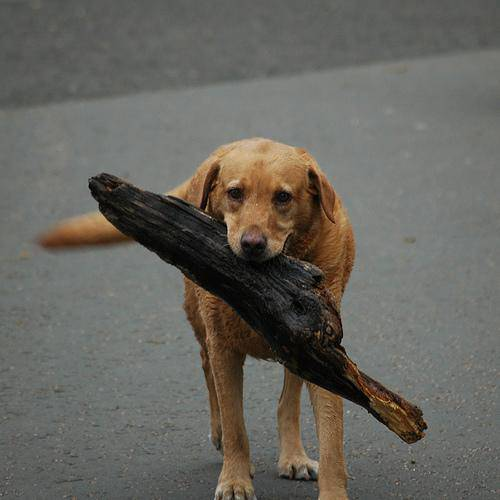

In [8]:
# View an image
from IPython.display import Image
Image('/content/drive/My Drive/Dog vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg')

### Getting images and their lables

getting list of all our images file path-names

In [9]:
# Create pathnames from image ID's
filenames = ['/content/drive/My Drive/Dog vision/train/'+ fnames + '.jpg' for fnames in labels_csv['id']]
# Check first 10
filenames[:10]

['/content/drive/My Drive/Dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/My Drive/Dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/My Drive/Dog vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/My Drive/Dog vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/My Drive/Dog vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/My Drive/Dog vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/My Drive/Dog vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/My Drive/Dog vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/My Drive/Dog vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/My Drive/Dog vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [10]:
# Check no. of filenames matches no. of actual images
import os
if len(os.listdir('/content/drive/My Drive/Dog vision/train')) == len(filenames):
  print('Filenames matches the actual amount of files ')
else:
  print('Filenames do not match the actual amount of files')

Filenames matches the actual amount of files 


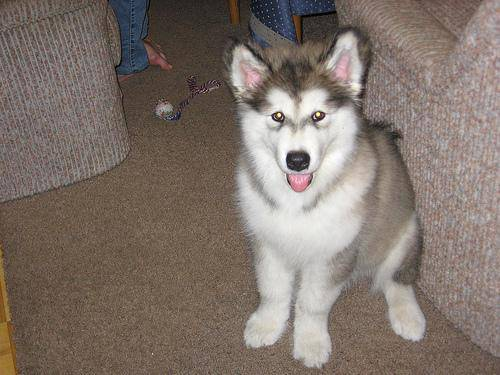

In [11]:
Image(filenames[3000])

In [12]:
labels_csv['breed'][3000]

'malamute'

Prepare our labels

In [13]:
import numpy as np
labels = labels_csv['breed'].to_numpy()
# labels = np.array(labels) # does the same thing as above
labels


array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [14]:
# Check if the no. of labels matches the no. of filenames
if len(labels)==len(filenames):
  print('Yes it does')
else:
  print('NO it doesnt')

Yes it does


In [15]:
# Find unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [16]:
# Turn every label into an array of booleans
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [17]:
len(boolean_labels)

10222

In [18]:
# Example: Turning boolean arrays into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be 1 where the sample label is occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [19]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set

In [0]:
# Setup X and y variables 
X = filenames
y = boolean_labels

Starting of the experiment with ~1000 and increase as needed

In [0]:
# Set no. of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:'slider',min:1000,max:10000,step:1000}

In [22]:
# Split our data into train and validation sets
from sklearn.model_selection import train_test_split
np.random.seed(42)
# Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

# Preprocessing images (Turning images into tensors)
To preprocess our images into tensors we may write a function which does the following things:
1. take an image file-path as input 
2. use tensor flow to read the files and read the variables, 'image' 
3. turn our image .jpg into Tensors and normalize our image and covert colour channel values from 0-255 to 0-1
4. Resize the 'image' to be shape of (224,224)
5. return the modified image

In [0]:
 # Define image size 
 IMG_SIZE = 224

 # Create a fun for preprocessing function 
 def process_image(image_path, img_size=IMG_SIZE):
   """
   Takes the image file path and turns it into a Tensor.
   """
   # Read in image file
   image = tf.io.read_file(image_path)
   # turn the jpeg image into numerical tensor with 3 colour channel RGB
   image = tf.image.decode_jpeg(image,channels=3)
   # Convert the colour channel value from 0-255 to 0-1 value
   image = tf.image.convert_image_dtype(image,tf.float32)
   # Resize the image to our desired value 
   image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
   return image

## Turning our data into batches
Why??
If we try to process 10000 images in 1 go they might not fit in the memory .
Slows down the training process.
Therefor bathch size is 32 here 

In order to use TensorFlow effectively we need our data in the form of tensor tuples which look like this 
(image, label).

In [0]:
# Create a simple function to return the tuple of tensors 

def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  process the image and returns a tuple of image (image, label).
  """
  
  image = process_image(image_path)
  return image, label 

## Funtion to make all our data X and y into batches

In [0]:
# Define the batch size 
BATCH_SIZE = 32

# Create fun. to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image X and label y pairs 
  It shuffles the data if it's training data but doesnt shuffle if its validation data.
  Also accepts test data as input(no labels).
  """
  # If the data is test data we dont have labels 
  if test_data:
    print('Creating test data batches')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch 

  # If data is valid data we dont need to shuffle it
  elif valid_data:
    print('Creating validation data batches')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                              tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch 

  else:
    print('Creating training batches')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                              tf.constant(y)))
    # Shuffling data
    data = data.shuffle(buffer_size=len(X))
    # Create image label tuple 
    data = data.map(get_image_label)
    # Turning into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch 


In [26]:
# Creating training and validation batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training batches
Creating validation data batches


In [27]:
# Checking diff attributes
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualising data batches 

Our data is in batches so visualising them

In [0]:
import matplotlib.pyplot as plt
 # Create a fun for viewing images in data batches 
def show_25_images(images, labels):
   plt.figure(figsize=(10, 10))
   # 25 images
   for i in range(25):
     # create subplots 
     ax = plt.subplot(5, 5, i+1)
     # display the image 
     plt.imshow(images[i])
     # add the image label as title
     plt.title(unique_breeds[labels[i].argmax()])
     # Turn the grid lines off
     plt.axis('off')

In [29]:
unique_breeds[y[0].argmax()]

'boston_bull'

In [30]:
train_images, train_label = next(train_data.as_numpy_iterator())
len(train_images), len(train_label)

(32, 32)

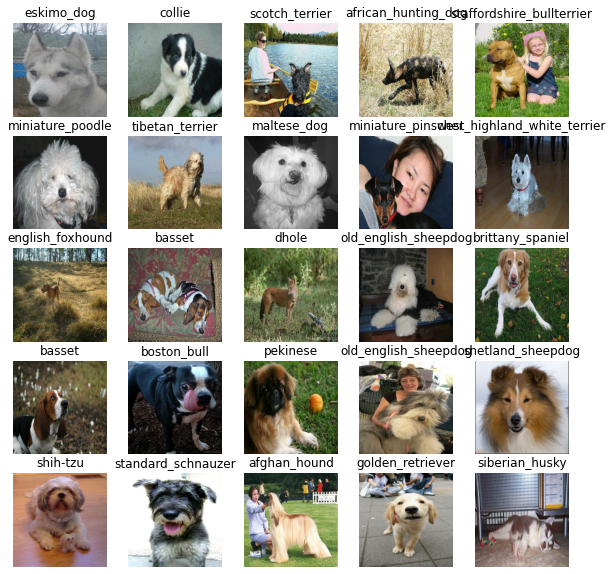

In [31]:
# using visualising fun
show_25_images(train_images, train_label)

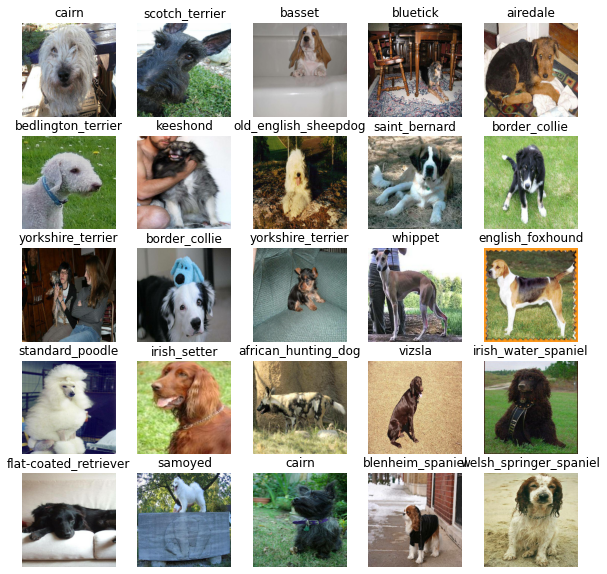

In [32]:
# Visualise the validation set

val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model  
Before we build a model , there are a few things that we need to define 
1. Input shape in the form of tensors
2. Outshape shape in the form of tensors
3. URL of the model we want to use from tensorflowhub

In [0]:
# Setup input shape of our model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] 
# Setup the output shape 
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from tesnor flow hub 

MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4'

Inputs, outputs and model is ready.
Putting them into keras deep learning model

Creating fun to:
* takes input shape, output shape, and the chosen model.
* defines the layers the layers in keras model in squential fashion
* compiles the model
* Builds a model

In [0]:
# Create a fun which creates a keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print('Building model with', MODEL_URL)
  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                           activation='softmax') # Layer 2
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [35]:
model = create_model()
model.summary()


Building model with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


# Create some callbacks 
Callbacks are helper fun model can use in training to do such things as save its progress, check its progress, or stop training early
Creating 2 callbaks here 
1.TensorBoard for which helps us to track our model progress
2.Early stoppin

## TensorBoard callback
1. load tensorboard notebook extention
2. create a tensorboard callback whic is able to save logs to a directory and pass it to our models fit() fun
3. visualize our models training logs with %tensorboard magiv fun

In [0]:
# Load TensorBoard notebook extention
%load_ext tensorboard


In [0]:
import datetime

# Create fun to tensorboard callback
def create_tensorboard_callback():
  # create log directory for storing tensorboard logs
  logdir = os.path.join('/content/drive/My Drive/Dog vision/logs',
                         # Make it so the logs get tracked whenever we run a experiment 
                        datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early stopping callback
It stops overfitting

In [0]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=3)

##  Training a model (on subset of data i.e 1000 images)

In [0]:
NUM_EPOCHS = 100 #@param{type:"slider", min:10, max:100, step:10}


# Create a fun that trains a model 

create model using create_model
setup a tensorboard callback using create_tensorboard_callback
call fit() on our model 
return our model

In [0]:
def train_model():
  model = create_model()

  # create new tensorboard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # fit the model to the data passing it the callbacks we created 

  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # return model
  return model

In [41]:
model = train_model()


Building model with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 700s 28s/step - loss: 4.5560 - accuracy: 0.1088 - val_loss: 3.4443 - val_accuracy: 0.2450
Epoch 2/100
25/25 [==============================] - 7s 260ms/step - loss: 1.6479 - accuracy: 0.6900 - val_loss: 2.1917 - val_accuracy: 0.4950
Epoch 3/100
25/25 [==============================] - 6s 258ms/step - loss: 0.5733 - accuracy: 0.9350 - val_loss: 1.6674 - val_accuracy: 0.5900
Epoch 4/100
25/25 [==============================] - 7s 261ms/step - loss: 0.2569 - accuracy: 0.9850 - val_loss: 1.4818 - val_accuracy: 0.6550
Epoch 5/100
25/25 [==============================] - 7s 260ms/step - loss: 0.1498 - accuracy: 0.9950 - val_loss: 1.4071 - val_accuracy: 0.6650
Epoch 6/100
25/25 [==============================] - 7s 260ms/step - loss: 0.1016 - accuracy: 1.0000 - val_loss: 1.3626 - val_accuracy: 0.6600
Epoch 7/100
25/25 [==============================]

## Checking the Tensorboard logs 
The TensorBoard magivc fun (%tensorboard) will access the directory and visualize the content

In [42]:
%tensorboard --logdir '/content/drive/My Drive/Dog vision/logs'

<IPython.core.display.Javascript object>

## Making and evaluating prediction using a trained model 

In [43]:
# Make prediction on validation data (not used to train on)
prediction = model.predict(val_data, verbose=1)
prediction

7/7 [==============================] - 1s 166ms/step


array([[9.2743884e-04, 1.3340625e-04, 2.7496944e-04, ..., 2.4657551e-04,
        6.2623345e-05, 5.2900095e-03],
       [9.6661504e-03, 3.8566780e-03, 3.4831685e-03, ..., 1.9885714e-03,
        4.1823145e-03, 1.4061246e-04],
       [2.0372888e-04, 2.7811711e-04, 2.9845463e-04, ..., 2.2431262e-04,
        1.4818877e-04, 4.8578944e-04],
       ...,
       [1.8463828e-06, 3.1298045e-05, 9.2748240e-05, ..., 3.7733567e-05,
        6.8067813e-05, 1.8454868e-04],
       [9.6338463e-04, 8.7211389e-05, 5.5385157e-05, ..., 3.2440177e-04,
        7.8229859e-05, 2.7646229e-03],
       [2.0582101e-04, 6.9383656e-05, 3.8659198e-03, ..., 5.2897837e-03,
        9.6692020e-05, 3.7043450e-05]], dtype=float32)

In [44]:
prediction.shape

(200, 120)

In [45]:
## Turning prediction probabilties into respective labels 
def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]
  # get preddicted label
pred_label = get_pred_label(prediction[81])
get_pred_label

<function __main__.get_pred_label>

Unbatch our validation dataaset

In [46]:
# create a fun to unbatch data
def unbatchify(data):
  images = []
  labels = []
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels


# unbatchify validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_images[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

# visualize what we have done above 

In [0]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  pred_label = get_pred_label(pred_prob)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.title('{} {:2.0f}% {}'.format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

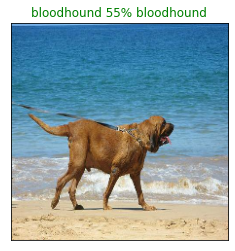

In [48]:
plot_pred(prediction_probabilities=prediction,
          labels=val_labels,
          images=val_images,
          n=100)

### viewing model of top 10 predictions 

In [0]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  pred_prob, true_label = prediction_probabilities[n], labels[n]
  pred_label = get_pred_label(pred_prob)
  # find top 10
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # find top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # find top 10 pred. labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color='grey')
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation='vertical')
  
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color('green')
  else:
    pass


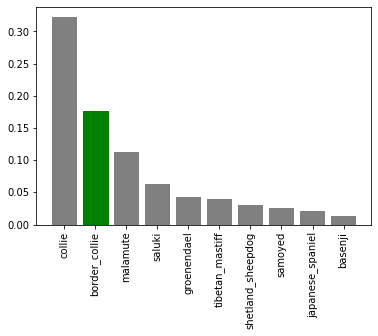

In [50]:
plot_pred_conf(prediction_probabilities=prediction,
               labels=val_labels,
               n=9)

## Saving and reloading our trained model 

In [0]:
def save_model(model, suffix=None):
  modeldir = os.path.join('/content/drive/My Drive/Dog vision/model',
                          datetime.datetime.now().strftime('%Y%m%d-%H%M%s'))
  model_path = modeldir + '-' + suffix + '.h5'
  print(f'saving model path to: {model_path}....')
  model.save(model_path)
  return model_path 

In [0]:
# Load a trained model
def load_model(model_path):
  print(f'Loading saved model from : {model_path}')
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={'KerasLayer':hub.KerasLayer})
  return model

In [53]:
# saving our model trained on 1000 images
save_model(model, suffix='1000-images-mobilenetv2-Adam')

saving model path to: /content/drive/My Drive/Dog vision/model/20200607-13481591537685-1000-images-mobilenetv2-Adam.h5....


'/content/drive/My Drive/Dog vision/model/20200607-13481591537685-1000-images-mobilenetv2-Adam.h5'

In [54]:
# Load the same file
loaded_1000_image_model = load_model('/content/drive/My Drive/Dog vision/model/20200426-14421587912163-1000-images-mobilenetv2-Adam.h5')

Loading saved model from : /content/drive/My Drive/Dog vision/model/20200426-14421587912163-1000-images-mobilenetv2-Adam.h5


In [55]:
model.evaluate(val_data)

7/7 [==============================] - 1s 148ms/step - loss: 1.2836 - accuracy: 0.6750


[1.2835588455200195, 0.675000011920929]

In [56]:
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 159ms/step - loss: 1.2947 - accuracy: 0.6700


[1.2947256565093994, 0.6700000166893005]

## Training model on full dataset 

In [57]:
# Create a data batch with full dataset 
ful_data = create_data_batches(X, y)
ful_data

Creating training batches


<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [58]:
# create a model for full model
full_model = create_model()

Building model with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [0]:
# create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# no validation set when training on all the data so we cant monitor validation accuracy 
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                             patience=3)

In [60]:
# fit the model to full data 
full_model.fit(x=ful_data, epochs = NUM_EPOCHS, callbacks=[full_model_tensorboard, full_model_early_stopping])
 # Fitting the model will take time like 30 min  

Epoch 1/100
320/320 [==============================] - 7347s 23s/step - loss: 1.3393 - accuracy: 0.6720
Epoch 2/100
320/320 [==============================] - 66s 206ms/step - loss: 0.4012 - accuracy: 0.8807
Epoch 3/100
320/320 [==============================] - 65s 203ms/step - loss: 0.2352 - accuracy: 0.9373
Epoch 4/100
320/320 [==============================] - 65s 202ms/step - loss: 0.1520 - accuracy: 0.9621
Epoch 5/100
320/320 [==============================] - 65s 202ms/step - loss: 0.1067 - accuracy: 0.9768
Epoch 6/100
320/320 [==============================] - 64s 199ms/step - loss: 0.0753 - accuracy: 0.9877
Epoch 7/100
320/320 [==============================] - 63s 197ms/step - loss: 0.0581 - accuracy: 0.9912
Epoch 8/100
320/320 [==============================] - 63s 197ms/step - loss: 0.0460 - accuracy: 0.9944
Epoch 9/100
320/320 [==============================] - 65s 204ms/step - loss: 0.0381 - accuracy: 0.9953
Epoch 10/100
320/320 [==============================] - 66s 206m